# Training Monitor

In [1]:
import matplotlib.pyplot as plt

In [5]:
import datetime
import os

entry_point = os.getcwd()
checkpoint_dir = os.path.join(entry_point,"/weights")

exec(open(os.path.join(entry_point, "model_compile.py")).read())
# exec(open(os.path.join(entry_point, "model_compile-dunet.py")).read())
#exec(open(os.path.join(entry_point, "model_compile-transfer.py")).read())

Tensorflow ver. 2.9.1
1 Physical GPUs, 1 Logical GPUs
Image Size is set to: 128
Debug: Draw Buffer size: 100
Debug: Batch Size: 16
The Training Dataset contains 7434 images.
The Testing Dataset contains 930 images.
The Dev Dataset contains 929 images.
The Prediction Dataset contains 0 images.
SUCCESS: Passed Unit Test for Data Loader
Steps per epoch: 464
Val steps: 0
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 128, 128, 64  3520        ['input_2[0][0]']                
                   

# Sanity Check, plot a datapoint

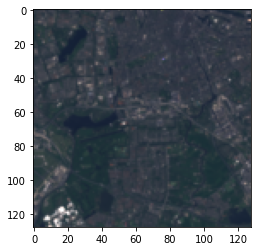

Label est:8156.9755859375


In [55]:
seq = 0
for i in train_dataset.take(50):
    if seq == 25:
        feature = i[0]
        label = i[1]
    seq+=1

# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax1.imshow(feature)
# ax2 = fig.add_subplot(1,2,2)
# ax2.imshow(label, vmin=0, vmax=1, cmap="gray")

# plt.show()

plt.imshow(feature[:,:,:3])
plt.show()
print(f"Label est:{label}")

In [6]:
model_name = "2.1-unet-6c"
log_dir = f'logs/fit/{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}-{model_name}'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# On GPU
# with tf.device('/GPU:0'):
model_history = model.fit(dataset['train'], epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=dataset['dev'],
                          callbacks = [tensorboard_callback])


Epoch 1/40
464/464 [==============================] - 1457s 3s/step - loss: 0.1484
Epoch 2/40
464/464 [==============================] - 1417s 3s/step - loss: 0.1047
Epoch 3/40
464/464 [==============================] - 1420s 3s/step - loss: 0.0992
Epoch 4/40
464/464 [==============================] - 1413s 3s/step - loss: 0.0953
Epoch 5/40
464/464 [==============================] - 1404s 3s/step - loss: 0.0936
Epoch 6/40
464/464 [==============================] - 1406s 3s/step - loss: 0.0945
Epoch 7/40
464/464 [==============================] - 1404s 3s/step - loss: 0.0917
Epoch 8/40
464/464 [==============================] - 1412s 3s/step - loss: 0.0905
Epoch 9/40
464/464 [==============================] - 1409s 3s/step - loss: 0.0893
Epoch 10/40
464/464 [==============================] - 1409s 3s/step - loss: 0.0879
Epoch 11/40
464/464 [==============================] - 1417s 3s/step - loss: 0.0877
Epoch 12/40
464/464 [==============================] - 1404s 3s/step - loss: 0.0871
E

In [5]:
%tensorboard --logdir logs/fit

In [8]:
#mod_name = "09012022_1.ckpt"
loss = model.evaluate(dataset['dev'], verbose=2)
print(f"Test Performance: RMSE: {loss}")

59/59 - 170s - loss: 0.0946 - 170s/epoch - 3s/step
Test Performance: RMSE: 0.09461461007595062


# Testing on Test Set

In [9]:
#mod_name = "09012022_1.ckpt"
loss = model.evaluate(dataset['test'], verbose=2)
print(f"Test Performance: RMSE: {loss}")

59/59 - 170s - loss: 0.0982 - 170s/epoch - 3s/step
Test Performance: RMSE: 0.09818017482757568


In [7]:
# model.save_weights(os.path.join(checkpoint_dir,mod_name))
model.save(os.path.join(checkpoint_dir,"20220927_unet_6c"))

INFO:tensorflow:Assets written to: f:\gis\github\v2\weights\20220927_unet_6c\assets


INFO:tensorflow:Assets written to: f:\gis\github\v2\weights\20220927_unet_6c\assets


In [10]:
preds = model.predict(dataset['test'])

59/59 [==============================] - 168s 3s/step


In [11]:
preds.shape

(930, 128, 128, 1)

# Pred Check

# Unet model (image prediction possible)

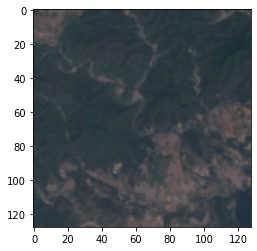

In [42]:

plt.imshow(feat_mbatch [12,:,:,:3])
plt.show()

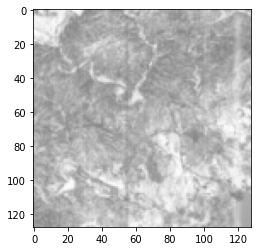

In [45]:

plt.imshow(ui_mbatch[12,:,:,:], vmin=-1, vmax=1, cmap="gray")
plt.show()

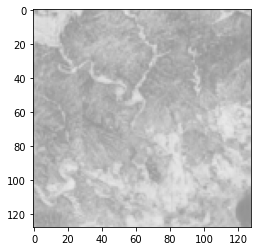

In [44]:
ex = preds[12,:,:,:]
plt.imshow(ex, vmin=-1, vmax=1, cmap="gray")
plt.show()

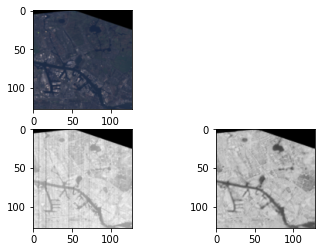

In [52]:
for i in dataset['test'].take(1):
        ui_mbatch = i[1]
        feat_mbatch = i[0]
idx = np.random.randint(0,15)
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(feat_mbatch [idx,:,:,:3])
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ui_mbatch[idx,:,:,:], vmin=0, vmax=1, cmap="gray")
ax3 = fig.add_subplot(gs[1, 1])
ax3.imshow(preds[idx,:,:,:], vmin=0, vmax=1, cmap="gray")

plt.show()

In [61]:
preds = pd.Series(list(preds))

In [62]:
preds

0      [6556.8403]
1      [8112.2393]
2      [6273.3286]
3      [6147.1846]
4      [6874.2817]
          ...     
925    [3233.4697]
926     [4123.688]
927    [156.82588]
928    [156.82588]
929     [6579.949]
Length: 930, dtype: object